In [50]:
from fastai.tabular.all import *

In [51]:
path = Path('../input/titanic')

In [52]:
path.ls()

(#3) [Path('../input/titanic/gender_submission.csv'),Path('../input/titanic/test.csv'),Path('../input/titanic/train.csv')]

In [53]:
train_df = pd.read_csv(path/'train.csv')

In [54]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [56]:
cat_names = ['Pclass','Sex', 'Name', 'SibSp', 'Parch','Embarked','Cabin'] # not 'Ticket'
cont_names = ['Age', 'Fare']

In [57]:
splits = RandomSplitter()(range_of(train_df))

In [58]:
splits

((#713) [344,625,800,481,782,751,183,181,718,692...],
 (#178) [90,746,749,414,449,548,101,705,51,488...])

In [59]:
len(train_df)

891

In [60]:
procs = [FillMissing, Categorify, Normalize]

In [61]:
y_names = 'Survived'
y_block = CategoryBlock()

In [62]:
to = TabularPandas(train_df, procs=procs, cat_names=cat_names, cont_names=cont_names, y_names=y_names, y_block=y_block, splits=splits)

In [63]:
dls = to.dataloaders()

In [64]:
dls.show_batch()

,Pclass,Sex,Name,SibSp,Parch,Embarked,Cabin,Age_na,Age,Fare,Survived
0,3,female,"Ilmakangas, Miss. Pieta Sofia",1,0,S,#na#,False,25.000000,7.925001,0
1,3,male,"Johansson, Mr. Erik",0,0,S,#na#,False,22.000000,7.795800,0
2,3,female,"Goodwin, Mrs. Frederick (Augusta Tyler)",1,6,S,#na#,False,43.000000,46.900002,0
3,1,male,"Woolner, Mr. Hugh",0,0,S,C52,True,28.000000,35.500000,1
4,3,female,"Mullens, Miss. Katherine ""Katie""",0,0,Q,#na#,True,28.000000,7.733300,1
5,3,female,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",1,0,Q,#na#,True,28.000000,15.500000,1
6,3,male,"Sheerlinck, Mr. Jan Baptist",0,0,S,#na#,False,29.000000,9.500000,1
7,3,male,"Rush, Mr. Alfred George John",0,0,S,#na#,False,16.000000,8.050000,0
8,3,female,"Andersson, Miss. Ebba Iris Alfrida",4,2,S,#na#,False,6.000000,31.275000,0
9,3,male,"Duane, Mr. Frank",0,0,Q,#na#,False,65.000001,7.749999,0


In [65]:
trn_dl = TabDataLoader(to.train,bs=64, shuffle=True, drop_last=True)
val_dl = TabDataLoader(to.valid, bs=128)

In [66]:
dls = DataLoaders(trn_dl, val_dl)
dls.show_batch()

,Pclass,Sex,Name,SibSp,Parch,Embarked,Cabin,Age_na,Age,Fare,Survived
0,2,male,"Eitemiller, Mr. George Floyd",0,0,S,#na#,False,23.000000,12.999999,0
1,3,male,"Kraeff, Mr. Theodor",0,0,C,#na#,True,28.000000,7.895801,0
2,1,male,"Goldschmidt, Mr. George B",0,0,C,A5,False,71.000001,34.654202,0
3,3,male,"Holm, Mr. John Fredrik Alexander",0,0,S,#na#,False,43.000000,6.450000,0
4,3,male,"Bostandyeff, Mr. Guentcho",0,0,S,#na#,False,26.000000,7.895801,0
5,3,male,"Jonkoff, Mr. Lalio",0,0,S,#na#,False,23.000000,7.895801,0
6,3,female,"Panula, Mrs. Juha (Maria Emilia Ojala)",0,5,S,#na#,False,41.000000,39.687500,0
7,3,male,"Ibrahim Shawah, Mr. Yousseff",0,0,C,#na#,False,30.000000,7.229200,0
8,3,female,"Sage, Miss. Dorothy Edith ""Dolly""",8,2,S,#na#,True,28.000000,69.550002,0
9,2,female,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",1,1,S,#na#,False,44.999999,26.250000,1


In [67]:
dls._dbunch_type

fastai.tabular.data.TabularDataLoaders

In [68]:
learn = tabular_learner(dls, [200,100],metrics=accuracy)

SuggestedLRs(lr_min=0.002290867641568184, lr_steep=0.0063095735386013985)

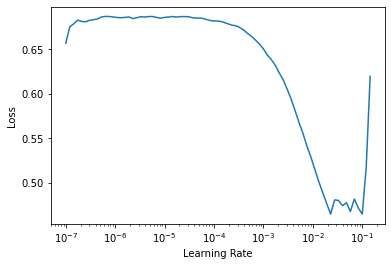

In [69]:
learn.lr_find()

In [70]:
learn.fit(3, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.600761,0.646481,0.685393,00:00
1,0.338099,0.902457,0.657303,00:00
2,0.205092,1.053281,0.752809,00:00


In [72]:
learn.unfreeze()
learn.fit_one_cycle(20, slice(1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.001977,0.796346,0.775281,00:00
1,0.001343,0.845702,0.786517,00:00
2,0.002248,0.917671,0.786517,00:00
3,0.001562,1.001947,0.780899,00:00
4,0.001409,1.012122,0.808989,00:00
5,0.001035,1.061159,0.792135,00:00
6,0.000778,1.079384,0.786517,00:00
7,0.000694,1.104235,0.792135,00:00
8,0.000536,1.131264,0.792135,00:00
9,0.000419,1.131235,0.792135,00:00


In [85]:
learn.show_results()

,Pclass,Sex,Name,SibSp,Parch,Embarked,Cabin,Age_na,Age,Fare,Survived,Survived_pred
0,1.0,1.0,777.0,2.0,1.0,1.0,42.0,2.0,-0.074424,2.287934,1.0,1.0
1,3.0,1.0,685.0,1.0,6.0,2.0,0.0,1.0,0.769698,-0.048497,0.0,1.0
2,3.0,1.0,720.0,7.0,3.0,3.0,0.0,2.0,-0.074424,0.756048,0.0,0.0
3,1.0,1.0,801.0,2.0,2.0,3.0,135.0,1.0,0.769698,0.957060,1.0,1.0
4,2.0,1.0,161.0,2.0,2.0,3.0,0.0,1.0,-0.304639,-0.031083,1.0,1.0
5,1.0,2.0,479.0,1.0,1.0,1.0,0.0,2.0,-0.074424,-0.076444,0.0,0.0
6,2.0,2.0,687.0,2.0,2.0,3.0,0.0,1.0,-2.159406,-0.254982,1.0,0.0
7,1.0,1.0,264.0,1.0,1.0,1.0,126.0,1.0,0.079052,0.504867,1.0,1.0
8,3.0,2.0,411.0,1.0,1.0,3.0,0.0,1.0,0.309268,-0.473409,0.0,0.0


In [74]:
test_df = pd.read_csv(path/'test.csv')

In [121]:
test_df.head()[0:1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


from : https://www.kaggle.com/hitesh1724/titanic-1-fastai-beginner-tutorial

In [94]:
g_train = test_df.columns.to_series().groupby(test_df.dtypes).groups
g_train

{int64: ['PassengerId', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']}

In [95]:
cat_names = ['Pclass','Sex', 'Name', 'SibSp', 'Parch','Embarked','Cabin'] # not 'Ticket'
cont_names = ['Age', 'Fare']

In [101]:
test = TabularPandas(test_df, procs=[FillMissing, Categorify, Normalize], cat_names=cat_names, cont_names=cont_names)

In [102]:
#getting the table value for test dataset.
# we used train.xs becoz it lets us extact the data we had given the tabularpandas function

X_test = test.train.xs

In [103]:
X_test.head()

,Pclass,Sex,Name,SibSp,Parch,Embarked,Cabin,Age_na,Fare_na,Age,Fare
0,3,2,207,1,1,2,0,1,1,0.386231,-0.497413
1,3,1,404,2,1,3,0,1,1,1.371369,-0.512278
2,2,2,270,1,1,2,0,1,1,2.553536,-0.464100
3,3,2,409,1,1,3,0,1,1,-0.204852,-0.482475
4,3,1,179,2,2,3,0,1,1,-0.598908,-0.417491


In [104]:
g_train = X_test.columns.to_series().groupby(X_test.dtypes).groups
g_train

{int8: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Cabin', 'Age_na', 'Fare_na'], int16: ['Name'], float64: ['Age', 'Fare']}

In [105]:
# lets drop fare_na
X_test = X_test.drop('Fare_na', axis=1)

In [151]:
X_test_dl = TabDataLoader(X_test, shuffle=False, drop_last=False)

In [152]:
try:
    #y_pred = learn.predict(X_test)
    y_pred,_ = learn.get_preds(dl=X_test_dl)
except Exception as e:
    print(e)
    

#how do we predict here ?????

Could not do one pass in your dataloader, there is something wrong in it


'DataFrame' object has no attribute 'with_cont'


trying the one given by Max : https://www.kaggle.com/muellerzr/end-to-end-fastai2

In [123]:
dl = learn.dls.test_dl(test_df)

In [125]:
try:
    preds = learn.get_preds(dl=dl)
except Exception as e:
    print(e)

'DataFrame' object has no attribute 'with_cont'


from : https://www.kaggle.com/muellerzr/fastai-v2-starter-code

In [142]:
test_df.head()[0:1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [136]:
to_test = TabularPandas(test_df, procs, cat_names, cont_names, y_names=y_names, y_block=y_block)


In [150]:
test_dl = TabDataLoader(to_test, shuffle=False, drop_last=False)

In [149]:
test_dl.show_batch()

,Pclass,Sex,Name,SibSp,Parch,Embarked,Cabin,Age_na,Fare_na,Age,Fare
0,3,male,"Kelly, Mr. James",0,0,Q,#na#,False,False,34.500000,7.829201
1,3,female,"Wilkes, Mrs. James (Ellen Needs)",1,0,S,#na#,False,False,46.999999,6.999998
2,2,male,"Myles, Mr. Thomas Francis",0,0,Q,#na#,False,False,62.000000,9.687500
3,3,male,"Wirz, Mr. Albert",0,0,S,#na#,False,False,27.000000,8.662501
4,3,female,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,S,#na#,False,False,22.000000,12.287500
5,3,male,"Svensson, Mr. Johan Cervin",0,0,S,#na#,False,False,14.000000,9.225001
6,3,female,"Connolly, Miss. Kate",0,0,Q,#na#,False,False,30.000000,7.629200
7,2,male,"Caldwell, Mr. Albert Francis",1,1,S,#na#,False,False,26.000000,29.000000
8,3,female,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,0,C,#na#,False,False,18.000000,7.229200
9,3,male,"Davies, Mr. John Samuel",2,0,S,#na#,False,False,21.000000,24.150000


In [137]:
try:
    preds, _ = learn.get_preds(dl=test_dl)
    #preds = np.expm1(preds.numpy())
except Exception as e:
    print(e)



index out of range in self


Making predictions

In [120]:
#y_pred  = y_pred.astype(int)
y_pred = 1 # let everyone survive
output= pd.DataFrame({'PassengerId':test_df.PassengerId, 'Survived': y_pred})
output.to_csv('my_submission_titanic.csv', index=False)
output.head()

,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


Other methods tried

In [90]:
# method 2

# test_preds = learn.get_preds(dl=test_df)
# test_df["Survived"] = np.exp(test_preds[0].data).numpy().T[0]
# test_df[["Id", "Survived"]] = test_df[["Id", "Survived"]].astype("int")
# test_df[["Id", "Survived"]].to_csv("submission.csv", index=False)

In [91]:
# method 3

# preds, _ = learn.get_preds(ds_type=DatasetType.Test)
# pred_prob, pred_class = preds.max(1)
#submission = pd.Dataframe({'PassengerId':test_df['PassengerId'], 'Survived': pred_class})
#submission.to_csv('submission.csv', index=False)